## Analysis of electricity usage pattern using K-means

In this project, we use K-means to find patterns in the daily electricity consumption behavior of households.

## Data set 

The data set contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months). The data set can be found from https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption#

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')

data_path =  'household_power_consumption.txt'
df = pd.read_csv(data_path, sep=';')
df.head()


C:\Users\sophi\anaconda3\envs\Py env 38\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [2]:
# only three columns are needed: Date, Time and Global_active_power
# Date: Date in format dd/mm/yyyy
# Time: time in format hh:mm:ss
# Global_active_power: household global minute-averaged active power (in kilowatt)

cols_to_use = ['Date', 'Time','Global_active_power']

df = pd.read_csv(data_path, sep=';', usecols=cols_to_use)

# create new column named as "datetime"
df['datetime'] = pd.to_datetime(df['Date'] + ' '+ df['Time'])

# drop columns Date and Time
df = df.drop(['Date','Time'], axis=1)
# set index for the new column
df = df.set_index('datetime')

df.head()

C:\Users\sophi\anaconda3\envs\Py env 38\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Global_active_power
datetime,
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666


In [3]:
df.info()   #view summary

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 1 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Global_active_power  object
dtypes: object(1)
memory usage: 31.7+ MB


In [4]:
df['Global_active_power'] = df['Global_active_power'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [5]:
df.head()

,Global_active_power
datetime,
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666


In [6]:
df.describe()     #to view statistic summary

,Global_active_power
count,2.049280e+06
mean,1.091615e+00
std,1.057294e+00
min,7.600000e-02
25%,3.080000e-01
50%,6.020000e-01
75%,1.528000e+00
max,1.112200e+01


In [7]:
df.isnull()

,Global_active_power
datetime,
2006-12-16 17:24:00,False
2006-12-16 17:25:00,False
2006-12-16 17:26:00,False
2006-12-16 17:27:00,False
2006-12-16 17:28:00,False
...,...
2010-11-26 20:58:00,False
2010-11-26 20:59:00,False
2010-11-26 21:00:00,False


In [8]:
# handle missing values
df = df.replace('?', np.nan)
# bfill: use next valid observation to fill gap
df = df.astype(float).fillna(method='bfill')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 1 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Global_active_power  float64
dtypes: float64(1)
memory usage: 31.7 MB


In [10]:
# For simplication, aggregate the power usage into one hour, so that each row represents a whole hour
df_hourly = df.resample('H').sum()
df_hourly['hour'] = df_hourly.index.hour
df_hourly.index = df_hourly.index.date

In [11]:
df_hourly.head()

,Global_active_power,hour
2006-12-16,152.024000,17
2006-12-16,217.932000,18
2006-12-16,204.013999,19
2006-12-16,196.114001,20
2006-12-16,183.388000,21


In [12]:
# reshape the dataframe
df_pivot = df_hourly.pivot(columns='hour')

In [13]:
df_pivot.head()

Global_active_power                                          \
hour                        0           1       2       3           4    
2006-12-16                 NaN         NaN     NaN     NaN         NaN   
2006-12-17          112.948001  200.964001  95.236  99.732  132.946001   
2006-12-18           16.582000   18.798000  17.068  18.596   61.580000   
2006-12-19           50.228000   21.182000  19.634  18.498   19.670000   
2006-12-20           27.590000   15.520000  47.062  18.602   17.340000   

                                                                 ...  \
hour             5       6           7           8           9   ...   
2006-12-16      NaN     NaN         NaN         NaN         NaN  ...   
2006-12-17  119.804  78.198   97.202000  113.434001  152.944001  ...   
2006-12-18   17.610  36.600  147.026000  124.928000   97.760000  ...   
2006-12-19   18.400  47.780  107.138000  232.742001   97.066000  ...   
2006-12-20   15.762  17.016   91.598001  175.056000   83.132000  ...   

                                                                     \
hour                14          15          16       17          18   
2006-12-16         NaN         NaN         NaN  152.024  217.932000   
2006-12-17  125.557999  179.123999  199.561999  204.406  221.826000   
2006-12-18  103.982000  107.058000  116.958000  129.294  144.151999   
2006-12-19   18.128000   25.282000   82.328000  126.690  132.281999   
2006-12-20   77.694000   16.868000   28.106000   34.410  170.210000   

                                                               
hour                19          20       21       22       23  
2006-12-16  204.013999  196.114001  183.388  132.008  123.696  
2006-12-17  174.504000  201.690000  182.446   91.080   26.264  
2006-12-18  156.870000  183.033999  130.184  104.328   92.836  
2006-12-19  110.526000  176.432000   86.572   43.200   23.022  
2006-12-20  194.918000  214.527999  218.764  183.538  142.906  

[5 rows x 24 columns]

In [14]:
# handle missing value
df_pivot = df_pivot.dropna()

In [15]:
df_pivot.T.shape
df_pivot.T.head()             #dataframe.T to view transposed df

2006-12-17  2006-12-18  2006-12-19  2006-12-20  \
                    hour                                                   
Global_active_power 0     112.948001      16.582      50.228      27.590   
                    1     200.964001      18.798      21.182      15.520   
                    2      95.236000      17.068      19.634      47.062   
                    3      99.732000      18.596      18.498      18.602   
                    4     132.946001      61.580      19.670      17.340   

                          2006-12-21  2006-12-22  2006-12-23  2006-12-24  \
                    hour                                                   
Global_active_power 0         92.152      16.016  101.894000  241.680000   
                    1         83.878      16.320  103.368001  196.541999   
                    2         76.494      16.058  102.046000  138.182000   
                    3         18.156      16.432  106.292001   96.406000   
                    4         14.804      15.856  113.496000   94.566000   

                          2006-12-25  2006-12-26  ...  2010-12-02  2010-12-03  \
                    hour                          ...                           
Global_active_power 0         59.974  145.455999  ...      19.296      83.868   
                    1         72.406  144.158001  ...      18.246      21.354   
                    2         26.280  144.656000  ...      59.190      18.116   
                    3         35.398  146.944000  ...      19.202      17.896   
                    4         34.720  179.550001  ...      22.474      18.430   

                          2010-12-04  2010-12-05  2010-12-06  2010-12-07  \
                    hour                                                   
Global_active_power 0         23.380      19.584      58.472      66.032   
                    1         21.698      59.170      25.414      23.094   
                    2         22.486      30.088      48.152      28.124   
                    3         46.488      21.054      19.114      20.464   
                    4         23.182      18.894      20.546      21.752   

                          2010-12-08  2010-12-09  2010-12-10  2010-12-11  
                    hour                                                  
Global_active_power 0         37.004  114.978000      23.672      52.860  
                    1         56.490  105.758000      23.858      16.036  
                    2         16.658  136.446001      28.118      21.038  
                    3         16.208  134.158000      20.248      19.224  
                    4         18.534   85.730000      20.030      16.752  

[5 rows x 1456 columns]

<AxesSubplot:xlabel='None,hour'>

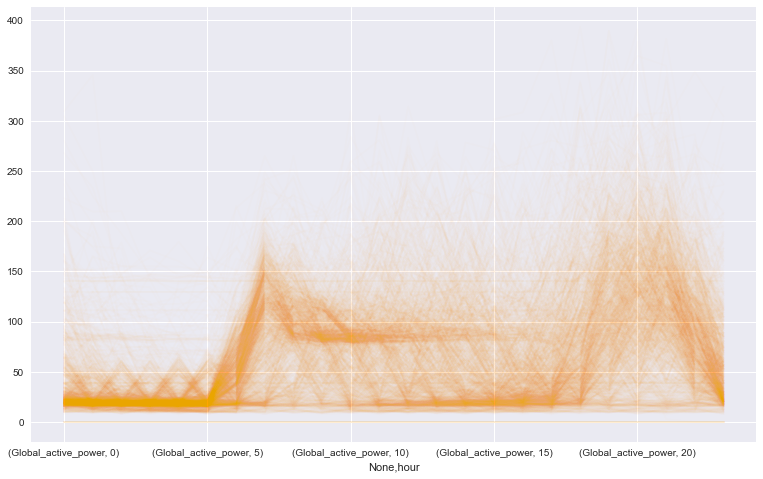

In [16]:
# alpha: Set the alpha value used for blending
df_pivot.T.plot(figsize=(13,8), legend=False, color='orange',alpha = 0.01)

Based on the graph, to obseve the patterns of consumption behavior

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

Next, we calculate silhouette values. Silhoutte score measures how similar a point is to its own cluster compared to other clusters. 
It ranges from -1 to 1, where a high value indicates that a point has a good match with the cluster it belongs.

In [18]:
sillhoute_scores = []

n_cluster_list = np.arange(2,31).astype(int)

In [19]:
X = df_pivot.values.copy()
    
# Scale each point within the same range
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [20]:
for n_cluster in n_cluster_list:
    
    kmeans = KMeans(n_clusters=n_cluster)
    cluster_found = kmeans.fit_predict(X)
    sillhoute_scores.append(silhouette_score(X, kmeans.labels_))

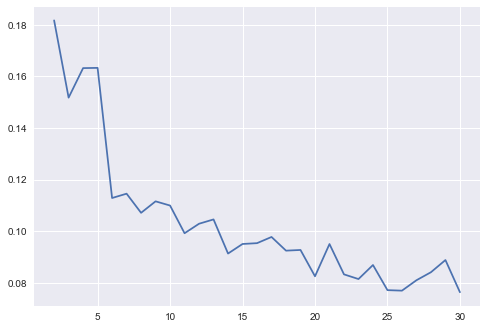

In [21]:
plt.plot(n_cluster_list, sillhoute_scores)

# Use elbow method to choose the best cluster number

From the graph, we choose 3 as the number of clusters based on elbow method.

In [22]:
kmeans = KMeans(n_clusters=3)
cluster_found = kmeans.fit_predict(X)
cluster_found_sr = pd.Series(cluster_found, name='cluster')
df_pivot = df_pivot.set_index(cluster_found_sr, append=True )

df_pivot.head()

Global_active_power                              \
hour                                0           1       2       3    
           cluster                                                   
2006-12-17 2                112.948001  200.964001  95.236  99.732   
2006-12-18 2                 16.582000   18.798000  17.068  18.596   
2006-12-19 1                 50.228000   21.182000  19.634  18.498   
2006-12-20 1                 27.590000   15.520000  47.062  18.602   
2006-12-21 1                 92.152000   83.878000  76.494  18.156   

                                                                         \
hour                        4        5       6           7           8    
           cluster                                                        
2006-12-17 2        132.946001  119.804  78.198   97.202000  113.434001   
2006-12-18 2         61.580000   17.610  36.600  147.026000  124.928000   
2006-12-19 1         19.670000   18.400  47.780  107.138000  232.742001   
2006-12-20 1         17.340000   15.762  17.016   91.598001  175.056000   
2006-12-21 1         14.804000   17.442  17.740   76.828000   93.782001   

                                ...                                      \
hour                        9   ...          14          15          16   
           cluster              ...                                       
2006-12-17 2        152.944001  ...  125.557999  179.123999  199.561999   
2006-12-18 2         97.760000  ...  103.982000  107.058000  116.958000   
2006-12-19 1         97.066000  ...   18.128000   25.282000   82.328000   
2006-12-20 1         83.132000  ...   77.694000   16.868000   28.106000   
2006-12-21 1        154.547999  ...   61.434000   18.444000   81.604000   

                                                                       \
hour                     17          18       19          20       21   
           cluster                                                      
2006-12-17 2        204.406  221.826000  174.504  201.690000  182.446   
2006-12-18 2        129.294  144.151999  156.870  183.033999  130.184   
2006-12-19 1        126.690  132.281999  110.526  176.432000   86.572   
2006-12-20 1         34.410  170.210000  194.918  214.527999  218.764   
2006-12-21 1        105.158  146.598000  131.828  146.241999   58.936   

                                      
hour                     22       23  
           cluster                    
2006-12-17 2         91.080   26.264  
2006-12-18 2        104.328   92.836  
2006-12-19 1         43.200   23.022  
2006-12-20 1        183.538  142.906  
2006-12-21 1         16.816   16.226  

[5 rows x 24 columns]

Text(0.5, 0, 'hour')

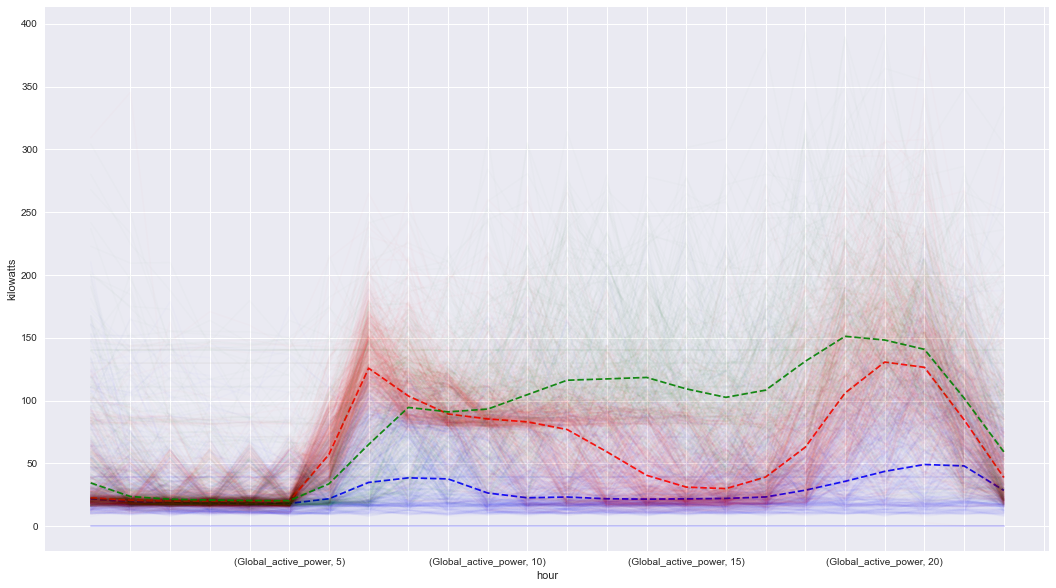

In [23]:
fig, ax= plt.subplots(1,1, figsize=(18,10))
color_list = ['blue','red','green']
cluster_values = sorted(df_pivot.index.get_level_values('cluster').unique())

for cluster, color in zip(cluster_values, color_list):
    df_pivot.xs(cluster, level=1).T.plot(
        ax=ax, legend=False, alpha=0.01, color=color, label= f'Cluster {cluster}'
        )
    df_pivot.xs(cluster, level=1).median().plot(
        ax=ax, color=color, alpha=0.9, ls='--'
    )

ax.set_xticks(np.arange(1,25))
ax.set_ylabel('kilowatts')
ax.set_xlabel('hour')

K-means found three unique energy consumption groups, as shown in chart above, denoted by green, blue and red. 

Red users have the lowest consumption. 
Blue group's electricity consumption starts to rise sharply around 5am but peaks and declines thereafter, before rising again in the evening.
Green group's consumption rises slower than Blue's in the morning, then flattens and rises slowly into the evening.

Overall, Green households have the highest consumption. Blue may exceed Green in the morning, but consumes less during the rest of the day. Red's consumption pattern is similar to Blue's with higher consumption in the morning and at night, but consumes the least out of all 3 groups.
